# <font style="color:blue">Project 2: Kaggle Competition - Classification</font>

#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Data Loader</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Configuration</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Evaluation Metric</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Train and Validation</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Model</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>6</h3></td> <td><h3>Utils</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>7</h3></td> <td><h3>Experiment</h3></td><td><h3>5</h3></td> </tr>
        <tr><td><h3>8</h3></td> <td><h3>TensorBoard Log</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>9</h3></td> <td><h3>Kaggle Profile Link</h3></td> <td><h3>50</h3></td> </tr>
    </table>
</div>


## <font style="color:green">Download the trainer pack</font>

In [1]:
!wget "https://raw.githubusercontent.com/RadimKozl/OpenCV_PyTorch_Project2/refs/heads/main/trainer.zip" -O ./trainer.zip

!ls /kaggle/working/

!unzip /kaggle/working/trainer.zip

!rm /kaggle/working/trainer.zip

--2024-10-15 09:51:57--  https://raw.githubusercontent.com/RadimKozl/OpenCV_PyTorch_Project2/refs/heads/main/trainer.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16840 (16K) [application/zip]
Saving to: './trainer.zip'

./trainer.zip       100%[===================>]  16.45K  --.-KB/s    in 0s      

2024-10-15 09:51:57 (47.0 MB/s) - './trainer.zip' saved [16840/16840]

trainer.zip
Archive:  /kaggle/working/trainer.zip
   creating: trainer/.ipynb_checkpoints/
  inflating: trainer/.ipynb_checkpoints/base_metric-checkpoint.ipynb  
  inflating: trainer/.ipynb_checkpoints/base_metric-checkpoint.py  
  inflating: trainer/.ipynb_checkpoints/configuration-checkpoint.py  
  inflating: trainer/.ipynb_checkpoints/hooks-checkpoint.py  
  inflating: trainer/.ipynb

## <font style="color:green">Imports</font>

In [2]:
%matplotlib inline


import os
import json
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import IPython
from PIL import Image

from operator import itemgetter
import multiprocessing as mp
mp.set_start_method('spawn', force=True)

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torchvision.transforms import functional as F

from torchvision import datasets, transforms
from torch.optim.lr_scheduler import MultiStepLR

torch.multiprocessing.set_start_method('spawn', force=True)

from trainer import Trainer, hooks, configuration
from trainer.utils import setup_system, patch_configs
from trainer.metrics import AccuracyEstimator
from trainer.tensorboard_visualizer import TensorBoardVisualizer
from trainer.custom_dataloader import JsonClassificationDataset


## <font style="color:green">Start TensorBoard by Ngrog tunnel</font>
<a href="https://ngrok.com/">Ngrog tunnel</a>

In [3]:
!tensorboard --version

2.16.2


In [4]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
!tar xf ./ngrok-v3-stable-linux-amd64.tgz -C /usr/local/bin

--2024-10-15 09:52:30--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9086963 (8.7M) [application/octet-stream]
Saving to: 'ngrok-v3-stable-linux-amd64.tgz'

ngrok-v3-stable-lin 100%[===================>]   8.67M  10.6MB/s    in 0.8s    

2024-10-15 09:52:31 (10.6 MB/s) - 'ngrok-v3-stable-linux-amd64.tgz' saved [9086963/9086963]



**Add to the console:**

```cmd
!ngrok authtoken <authtoken>
```

In [6]:
pool = mp.Pool(processes = 10)
results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
                        for cmd in [
                        f"tensorboard --logdir ./log_resnet18/ --load_fast=false --host 0.0.0.0 --port 6006 &",
                        "/usr/local/bin/ngrok http 6006 &"
                        ]]

In [7]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://fee5-34-141-220-55.ngrok-free.app


TensorBoard 2.16.2 at http://0.0.0.0:6006/ (Press CTRL+C to quit)


## <font style="color:green">1. Data Loader [10 Points]</font>

In this section, you have to write a class or methods, which will be used to get training and validation data loader.

You need to write a custom dataset class to load data.

**Note; There is   no separate validation data. , You will thus have to create your own validation set, by dividing the train data into train and validation data. Usually, we do 80:20 ratio for train and validation, respectively.**


For example:

```python
class KenyanFood13Dataset(Dataset):
    """
    
    """
    
    def __init__(self, *args):
    ....
    ...
    
    def __getitem__(self, idx):
    ...
    ...
    
    
```

```
def get_data(args1, *agrs):
    ....
    ....
    return train_loader, test_loader
```

### <font style="color:blue">Class for create JSON file of datasets</font>

We create Json structure of `train`, `valid` and `test` datasets, for creating PyTorch Dataloader a standard module of `trainer`.

In [8]:
class Transform_dataset:
    def __init__(self, root_dir, save_dir, name_json_file = 'datasets.json', ratio_split_value = 80):
        self.root_dir = root_dir
        self.save_dir = save_dir
        self.name_json_file = name_json_file
        self.ratio_split_value = ratio_split_value
        self.dir_image = os.path.join(self.root_dir, 'images', 'images')
        self.train_file = os.path.join(self.root_dir, 'train.csv')
        self.test_file = os.path.join(self.root_dir, 'test.csv')
        self.sample_file = os.path.join(self.root_dir, 'sample_submission.csv')
        self.json_file = os.path.join(self.save_dir, self.name_json_file)
        self.temp_train_file = os.path.join(self.save_dir,'temp_train.csv')
        self.temp_valid_file = os.path.join(self.save_dir, 'temp_valid.csv')
        self.temp_test_file = os.path.join(self.save_dir, 'temp_test.csv')
        self.dict_name_class = {}
        self.unique_classes_train = None
        
    def __get_file_paths(self, directory):
        file_paths = []
        
        for root, _, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                file_paths.append(file_path)
        return file_paths

    def __selest_class_id(self):
        train_values = pd.read_csv(self.train_file)

        class_counts_train = train_values['class'].value_counts()
        self.unique_classes_train = class_counts_train.index.tolist()
        self.unique_classes_train.sort()
       
        
        for name in self.unique_classes_train:
            self.dict_name_class[name] = int(self.unique_classes_train.index(name))

    def __train_test_split(self):
        # Load data from CSV file
        data = pd.read_csv(self.train_file)
    
        # set value for split data
        value_split = round(self.ratio_split_value/100, 2)
        
        # Get number of rows
        num_rows = len(data)
        
        # Calculate number of index of test/train data
        train_size = int(value_split * num_rows)  # 80% for training
        test_size = num_rows - train_size
        
    
        # Random index reordering
        indices = np.random.permutation(num_rows)
        train_indices = indices[:train_size]
        test_indices = indices[train_size:]
        
        # Create training and test set using indexes
        train_data = data.iloc[train_indices]
        test_data = data.iloc[test_indices]
        
        # Save split data to new CSV files
        train_data.to_csv(self.temp_train_file, index=False)
        test_data.to_csv(self.temp_valid_file, index=False) 

    def __get_image_shape(self, image_path):
        img = Image.open(image_path)
        w, h = img.size
        c =  img.mode
        cc = ''
        if c == 'RGB':
            cc = 'RGB'
        elif c == 'RGBA':
            cc = 'RGBA'
        elif c == 'L':
            cc = 'Grayscale'
        elif c == '1':
            cc = 'Grayscale'
        else:
            cc = c
        return (w, h, c)

    def __correct_test_file(self):
        table_1 = pd.read_csv(self.test_file)
        table_2 = pd.read_csv(self.sample_file)
        table_test_data = pd.merge(table_1, table_2, on='id', how='left')
        table_test_data.to_csv(self.temp_test_file, index=False)

    def __remove_temp_files(self):
        os.remove(self.temp_train_file)
        os.remove(self.temp_valid_file)
        os.remove(self.temp_test_file)

    def process_json(self):
        self.__train_test_split()
        self.__correct_test_file()
        self.__selest_class_id()

        table_train = pd.read_csv(self.temp_train_file) # load csv file of train data
        table_valid = pd.read_csv(self.temp_valid_file) # load csv file of valid data
        table_test = pd.read_csv(self.temp_test_file) # load csv file of test data

        # add type data selection
        table_train['type_dataset'] = 'train'
        table_valid['type_dataset'] = 'valid'
        table_test['type_dataset'] = 'test'

        # add all data together
        df_concat_1 = pd.concat([table_train, table_valid], axis=0)
        df_concat_2 = pd.concat([df_concat_1, table_test], axis=0)

        df_concat_2['class_idx'] = df_concat_2['class'].map(self.dict_name_class)

        list_path_image = self.__get_file_paths(self.dir_image) # load path of images 

        # create table of path images
        list_id = []
        list_paths = []
        list_types = []
        list_width = []
        list_height = []
        list_channel = []
        list_idx_class = []
        for img in list_path_image:
            img_name = os.path.split(img)[1]
            img_id = int(img_name.split('.')[0])
            img_suffix = img_name.split('.')[1]
            img_data = self.__get_image_shape(img)

            list_id.append(img_id)
            list_paths.append(img)
            list_types.append(img_suffix)
            list_width.append(img_data[0])
            list_height.append(img_data[1])
            list_channel.append(img_data[2])

        # create image table data
        image_table = pd.DataFrame({
            'id': list_id, 
            'path_file': list_paths, 
            'file_type': list_types, 
            'image_width': list_width, 
            'image_height': list_height,
            'image_channel': list_channel
        })

        table_all_data = pd.merge(df_concat_2, image_table, on='id', how='left')
        num_err_val = table_all_data['path_file'].isna().sum()

        dict_data = {'datasets':[{'train':[], 'valid': [], 'test': [], 'class_number': len(self.unique_classes_train), 'names_class': self.unique_classes_train},]}

        for i in range(len(table_all_data)):
            sub_dict = {}
            main_dict = {}
            id_file = int(table_all_data.iloc[i]['id'])
            class_file = table_all_data.iloc[i]['class']
            class_idx = int(table_all_data.iloc[i]['class_idx'])
            type_dataset = table_all_data.iloc[i]['type_dataset']
            path_file = table_all_data.iloc[i]['path_file']
            file_type = table_all_data.iloc[i]['file_type']
            image_width = int(table_all_data.iloc[i]['image_width'])
            image_height = int(table_all_data.iloc[i]['image_height'])
            image_channel = table_all_data.iloc[i]['image_channel']
            name_file = str(id_file) + '.' + file_type

            sub_dict['name'] = name_file
            sub_dict['class'] = class_file
            sub_dict['clidx'] = class_idx
            sub_dict['path'] = path_file
            sub_dict['type'] = file_type
            sub_dict['width'] = image_width
            sub_dict['height'] = image_height
            sub_dict['channel'] = image_channel

            main_dict[str(id_file)] = sub_dict

            if type_dataset == 'train':
                dict_data['datasets'][0]['train'].append(main_dict)
            elif type_dataset == 'valid':
                dict_data['datasets'][0]['valid'].append(main_dict)
            elif type_dataset == 'test':
                dict_data['datasets'][0]['test'].append(main_dict)
            else:
                print(table_all_data.iloc[i], 'not add to any dataset!')

        with open(self.json_file, 'w') as f:
            json.dump(dict_data, f, indent=4)

        print(f'Data were saved to file {self.json_file}')

        self.__remove_temp_files()
        

    def return_json_address(self):
        return self.json_file

In [9]:
%%time
root_dir = os.path.join('/kaggle','input','opencv-pytorch-classification-project-2')
save_dir = os.path.join('/kaggle','working')
name_json_file = 'datasets.json'
ratio_split_value = 80

json_file = Transform_dataset(
    root_dir=root_dir, 
    save_dir=save_dir, 
    name_json_file=name_json_file, 
    ratio_split_value=ratio_split_value
)
json_file.process_json()
path_json = json_file.return_json_address()
print('Path to the JSON data structure: ', path_json)

Data were saved to file /kaggle/working/datasets.json
Path to the JSON data structure:  /kaggle/working/datasets.json
CPU times: user 8.6 s, sys: 3.25 s, total: 11.8 s
Wall time: 1min 33s


### <font style="color:blue">Class for create custom dataloader from JSON file of datasets</font>

This is standart class of our `trainer package`. Class `JsonClassificationDataset` is inside `custom_dataloader.py` module. see: [Github - trainer package](https://github.com/RadimKozl/OpenCV_PyTorch_Project2/tree/main/trainer)

```python
class JsonClassificationDataset(Dataset):
    """Class for create Dataset for PyTorch from JSON file data

    Args:
        Dataset (class): PyTorch Dataset class
    """    
    def __init__(self, json_file, type_data='train', dataset_number=0, image_shape=None, transform=None):
        """Init method of class

        Args:
            json_file (str): path of JSON file with data of datasets
            type_data (str, optional): Setting of load type of dataset - 'train'/'valid'/'test' data. Defaults to 'train'.
            dataset_number (int, optional): This is number of creted variant of datasets. Defaults to 0.
            image_shape (int/tuple, optional): value of weight & height of resized image. Defaults to None.
            transform (torchvision.transforms.Compose, optional): list of transformation of PyTorch. Defaults to None.

        """
        super().__init__()
        self.json_file = json_file
        with open(self.json_file, 'r', encoding="utf-8") as f:
            self.config_datatasets = json.load(f)

        self.dataset_number = int(dataset_number)
        self.type_data = type_data
        self.base_setting = list(self.config_datatasets['datasets'][0].keys())

        # set image_resize attribute
        if image_shape is not None:
            if isinstance(image_shape, int):
                self.image_shape = (image_shape, image_shape)

            elif isinstance(image_shape, tuple) or isinstance(image_shape, list):
                assert len(image_shape) == 1 or len(image_shape) == 2, 'Invalid image_shape tuple size'
                if len(image_shape) == 1:
                    self.image_shape = (image_shape[0], image_shape[0])
                else:
                    self.image_shape = image_shape
            else:
                raise NotImplementedError

        else:
            self.image_shape = image_shape

        # set transform attribute
        self.transform = transform

        self.num_classes = self.config_datatasets['datasets'][self.dataset_number]['class_number']

        # initialize the data dictionary
        self.data_dict = {
            'image_path': [],
            'label': []
        }

        self._load_dataset()

    def _load_train_dataset(self):
        """Funcion for load train dataset
        """        
        number_records = len(self.config_datatasets['datasets'][self.dataset_number]['train'])

        for num in range(number_records):
            value_data = list(self.config_datatasets['datasets'][self.dataset_number]['train'][num].values())
            self.data_dict['image_path'].append(value_data[0]['path'])
            self.data_dict['label'].append(value_data[0]['clidx'])

    def _load_valid_dataset(self):
        """Function for load valid dataset
        """        
        number_records = len(self.config_datatasets['datasets'][self.dataset_number]['valid'])

        for num in range(number_records):
            value_data = list(self.config_datatasets['datasets'][self.dataset_number]['valid'][num].values())
            self.data_dict['image_path'].append(value_data[0]['path'])
            self.data_dict['label'].append(value_data[0]['clidx'])

    def _load_test_dataset(self):
        """Function for load test dataset
        """        
        number_records = len(self.config_datatasets['datasets'][self.dataset_number]['test'])

        for num in range(number_records):
            value_data = list(self.config_datatasets['datasets'][self.dataset_number]['test'][num].values())
            self.data_dict['image_path'].append(value_data[0]['path'])
            self.data_dict['label'].append(value_data[0]['clidx'])

    def _load_dataset(self):
        """Internal Method for load selected dataset

        Returns:
            str: if is wrong selection parameter, it was returned warring message.
        """        
        if self.type_data == 'train':
            if 'train' in self.base_setting:
                self._load_train_dataset()
            else:
                print('Json file does not contain dataset train')

        elif self.type_data == 'valid':
            if 'valid' in self.base_setting:
                self._load_valid_dataset()
            else:
                print('Json file does not contain dataset valid')

        elif self.type_data == 'test':
            if 'test' in self.base_setting:
                self._load_test_dataset()
            else:
                print('Json file does not contain dataset test')
        else:
            return 'False settings of type_data parameter.'

    def __len__(self):
        """Method of return length of the dataset
        
        Returns:
            str: if is wrong selection parameter, it was returned warring message.
        """
        if self.type_data == 'train':
            return len(self.config_datatasets['datasets'][self.dataset_number]['train'])
        elif self.type_data == 'valid':
            return len(self.config_datatasets['datasets'][self.dataset_number]['valid'])
        elif self.type_data == 'test':
            return len(self.config_datatasets['datasets'][self.dataset_number]['test'])
        else:
            return 'False settings of type_data parameter.'

    def __getitem__(self, idx):
        """Method for given index, return images with resize and preprocessing.

        Args:
            idx (int): number of index of image

        Returns:
            np.array, int: return image as np.array and number of class as int
        """        
        image = Image.open(self.data_dict['image_path'][idx]).convert("RGB")

        if self.image_shape is not None:
            image = F.resize(image, self.image_shape)

        if self.transform is not None:
            image = self.transform(image)

        target = self.data_dict['label'][idx]

        return image, target


    def common_name(self, label):
        """
        Method of class label to common name mapping
        """
        list_labels = list(self.config_datatasets['datasets'][0]['names_class'])
        return list_labels[label]
    
    def number_of_class(self):
        """Method for return number of class of datasets

        Returns:
            int: number of class of dataset
        """        
        return self.num_classes
    
    def names_of_classe(self):
        """Method return names of classes

        Returns:
            list(str): list of names of class
        """        
        return list(self.config_datatasets['datasets'][0]['names_class'])
```

In [10]:
json_file = os.path.join('/kaggle','working','datasets.json') # /kaggle/working/datasets.json

In [11]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
    ])

### <font style="color:blue">Create and show train dataset</font>

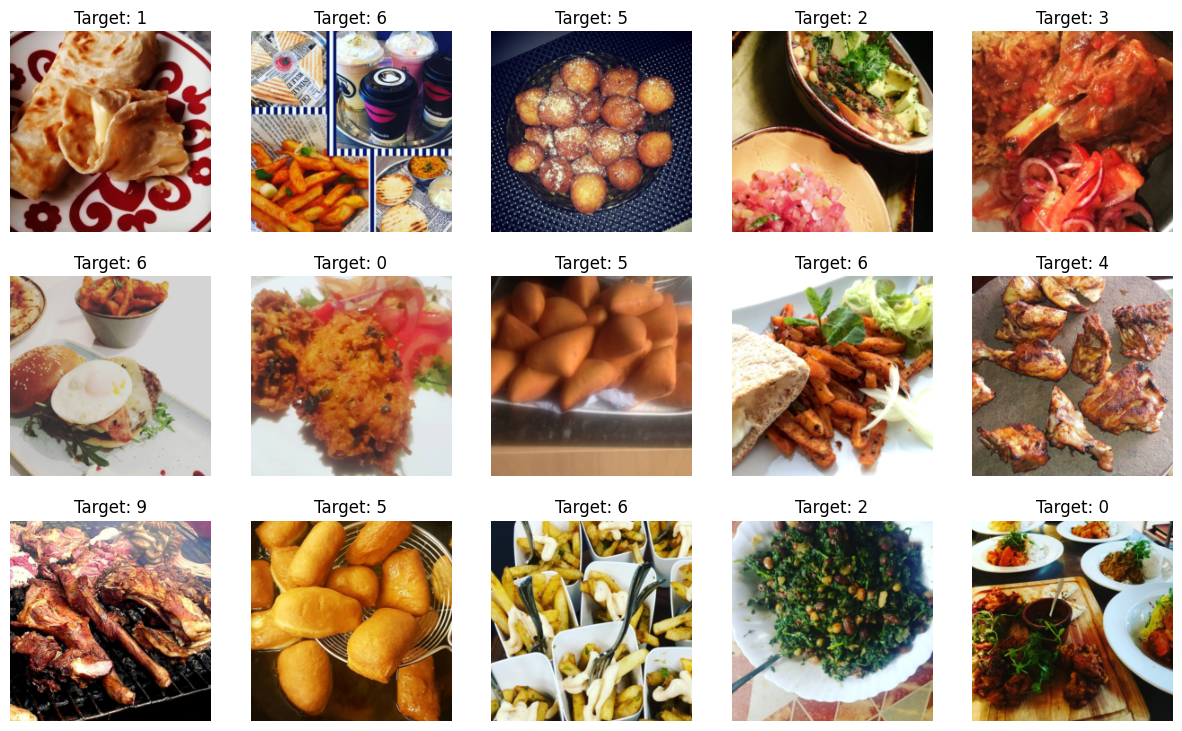

In [24]:
train_dataset =  JsonClassificationDataset(json_file, type_data='train', dataset_number=0, transform=preprocess)

# dataloader with dataset
train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=15,
        shuffle=True,
        num_workers=2
    )


# Plot few images
plt.rcParams["figure.figsize"] = (15, 9)
plt.figure
for images, labels in train_loader:
    for i in range(len(labels)):
        plt.subplot(3, 5, i+1)
        img = F.to_pil_image(images[i])
        plt.imshow(img)
        plt.gca().set_title('Target: {0}'.format(labels[i]))
        plt.axis('off')
    plt.show()
    break

### <font style="color:blue">Create and show valid dataset</font>

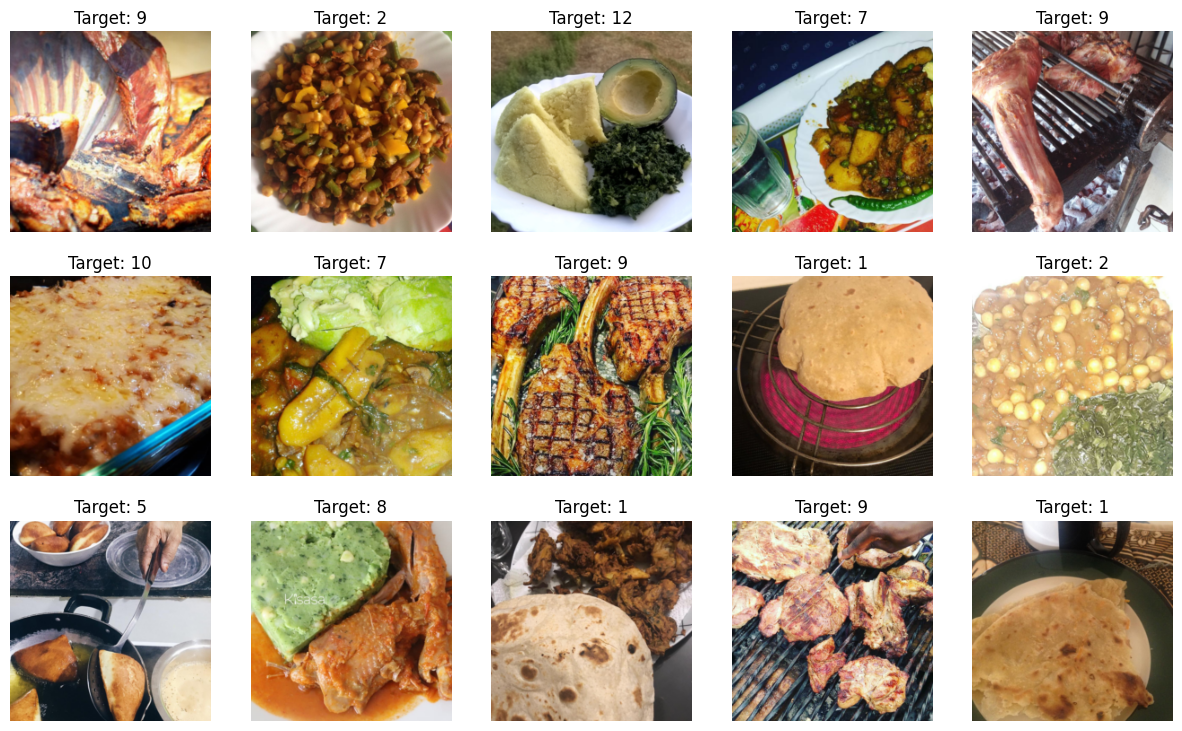

In [25]:
valid_dataset =  JsonClassificationDataset(json_file, type_data='valid', dataset_number=0, transform=preprocess)

# dataloader with dataset
valid_loader = torch.utils.data.DataLoader(
        valid_dataset,
        batch_size=15,
        shuffle=True,
        num_workers=2
    )


# Plot few images
plt.rcParams["figure.figsize"] = (15, 9)
plt.figure
for images, labels in valid_loader:
    for i in range(len(labels)):
        plt.subplot(3, 5, i+1)
        img = F.to_pil_image(images[i])
        plt.imshow(img)
        plt.gca().set_title('Target: {0}'.format(labels[i]))
        plt.axis('off')
    plt.show()
    break

### <font style="color:blue">Create and show test dataset</font>

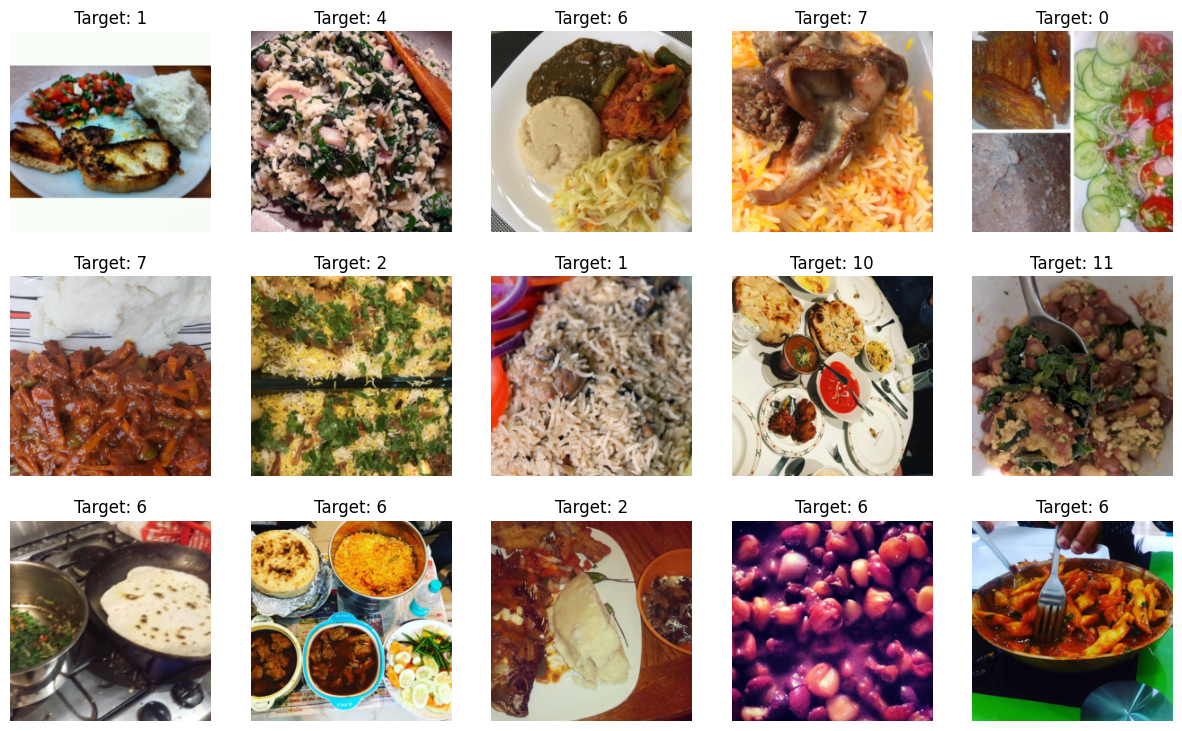

In [26]:
test_dataset =  JsonClassificationDataset(json_file, type_data='test', dataset_number=0, transform=preprocess)

# dataloader with dataset
test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=15,
        shuffle=True,
        num_workers=2
    )


# Plot few images
plt.rcParams["figure.figsize"] = (15, 9)
plt.figure
for images, labels in test_loader:
    for i in range(len(labels)):
        plt.subplot(3, 5, i+1)
        img = F.to_pil_image(images[i])
        plt.imshow(img)
        plt.gca().set_title('Target: {0}'.format(labels[i]))
        plt.axis('off')
    plt.show()
    break

## <font style="color:green">2. Configuration [5 Points]</font>

**Define your configuration here.**

For example:


```python
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 10 
    epochs_count: int = 50  
    init_learning_rate: float = 0.1  # initial learning rate for lr scheduler
    log_interval: int = 5  
    test_interval: int = 1  
    data_root: str = "/kaggle/input/opencv-pytorch-classification-project-2/" 
    num_workers: int = 2  
    device: str = 'cuda'  
    
```

## <font style="color:green">3. Evaluation Metric [10 Points]</font>

**Define methods or classes that will be used in model evaluation. For example, accuracy, f1-score etc.**

## <font style="color:green">4. Train and Validation [5 Points]</font>


**Write the methods or classes to be used for training and validation.**

## <font style="color:green">5. Model [5 Points]</font>

**Define your model in this section.**

**You are allowed to use any pre-trained model.**

## <font style="color:green">6. Utils [5 Points]</font>

**Define those methods or classes, which have  not been covered in the above sections.**

## <font style="color:green">7. Experiment [5 Points]</font>

**Choose your optimizer and LR-scheduler and use the above methods and classes to train your model.**

## <font style="color:green">8. TensorBoard Log [5 Points]</font>

**Share your TensorBoard scalars logs here You can also share (not mandatory) your GitHub link, if you have pushed this project in GitHub.**


<font style="color:red">Note:</font> In light of the recent shutdown of tensorboard.dev, we have updated the submission requirements for your project. Instead of sharing a tensorboard.dev link, you are now required to upload your generated TensorBoard event files directly onto the lab. As an alternative, you may also include a screenshot of your TensorBoard output within your Jupyter notebook. This adjustment ensures that your data visualization and model training efforts are thoroughly documented and accessible for evaluation.

## <font style="color:green">9. Kaggle Profile Link [50 Points]</font>

**Share your Kaggle profile link  with us here to score , points in  the competition.**

**For full points, you need a minimum accuracy of `75%` on the test data. If accuracy is less than `70%`, you gain  no points for this section.**


**Submit `submission.csv` (prediction for images in `test.csv`), in the `Submit Predictions` tab in Kaggle, to get evaluated for  this section.**